# Introduction

- Employee departure poses significant challenges for organizations, impacting both productivity and financial performance. In this project, we aim to examine a dataset containing **300,000 observations** and **30 features** to develop a predictive model for employee departure. Using various machine learning techniques, we aim to identify patterns that signal potential departure and pinpoint influential factors contributing to employee retention or departure.

## 1. Data Loading and Initial Exploration
**Focus**:  
- Loading the dataset, checking its shape, info, and describing basic statistics.

In [1]:
# importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
pd.set_option('display.max_rows', 200)  # set maximum rows displayed in Pandas DataFrames to 200
pd.set_option('display.max_columns', None) # set maximum columns displayed in Pandas DataFrames to unlimited (None)

In [3]:
# loading the dataset
df = pd.read_csv('employee_departure_dataset.csv', index_col=0)
df.head()

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,AttendanceRate,StressLevel,PeerFeedbackScore,AnnualLeaveDays,Dependents,Certifications,OnsiteOpportunities,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,1002332,1,>30miles,8,45,1,18,3,10,0,4,99.711052,2,3,18,2,4,1,1,1,1,5,3,1,59K,60K,4.0,5.0,2,0
1,1002333,0,~10miles,7,73,5,7,5,19,0,4,84.923010,3,4,15,3,1,1,1,3,7,9,3,7,61K,64K,4.0,4.0,2,0
2,1002334,0,<5mile,6,65,1,13,2,7,0,1,82.075062,2,3,11,1,0,1,1,5,8,4,3,1,61K,63K,4.0,4.0,3,0
3,1002335,0,~15miles,7,18,4,14,3,3,0,3,90.450602,5,4,3,4,2,1,1,2,3,4,4,5,58K,61K,5.0,5.0,7,0
4,1002336,1,~20miles,7,73,5,10,1,18,0,4,99.017646,5,1,17,4,3,0,1,2,5,1,6,3,61K,62K,5.0,5.0,5,0


In [4]:
# displaying summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RecordId                 300000 non-null  int64  
 1   Gender                   300000 non-null  int64  
 2   Distance                 299734 non-null  object 
 3   YearsWorked              300000 non-null  int64  
 4   TrainingHours            300000 non-null  int64  
 5   WorkLifeBalance          300000 non-null  int64  
 6   NumOfProjects            300000 non-null  int64  
 7   JobInvolvement           300000 non-null  int64  
 8   TeamSize                 300000 non-null  int64  
 9   MentorshipReceived       300000 non-null  int64  
 10  TechSkillLevel           300000 non-null  int64  
 11  AttendanceRate           300000 non-null  float64
 12  StressLevel              300000 non-null  int64  
 13  PeerFeedbackScore        300000 non-null  int64  
 14  AnnualLea

In [5]:
# shape of dataframe
df.shape

(300000, 30)

The dataset only has 3 categorical features and rest of the features are numerical

In [6]:
# descriptive statistics of dataframe
df.describe()

,RecordId,Gender,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,AttendanceRate,StressLevel,PeerFeedbackScore,AnnualLeaveDays,Dependents,Certifications,OnsiteOpportunities,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,SelfReview,SupervisorReview,DepartmentCode,Left
count,3.000000e+05,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,299404.000000,299423.000000,300000.000000,300000.000000
mean,1.152332e+06,0.401043,6.999463,49.56185,2.997280,10.016793,3.001797,9.999680,0.498273,2.998253,89.996077,2.997810,2.998567,14.505673,1.999190,1.996623,0.499423,0.500643,3.002780,4.994403,4.997240,4.996777,4.996520,4.399093,4.101412,3.997480,0.309633
std,8.660268e+04,0.490111,1.871401,28.81723,1.414951,5.484806,1.413865,5.472419,0.499998,1.413533,5.773993,1.415379,1.412340,8.661467,1.413267,1.414317,0.500001,0.500000,1.413166,2.579983,2.578817,2.582293,2.582018,0.663333,0.943855,2.161085,0.462343
min,1.002332e+06,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000075,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000
25%,1.077332e+06,0.000000,6.000000,25.00000,2.000000,5.000000,2.000000,5.000000,0.000000,2.000000,84.986555,2.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,0.000000
50%,1.152332e+06,0.000000,7.000000,50.00000,3.000000,10.000000,3.000000,10.000000,0.000000,3.000000,89.988180,3.000000,3.000000,15.000000,2.000000,2.000000,0.000000,1.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.000000
75%,1.227331e+06,1.000000,8.000000,75.00000,4.000000,15.000000,4.000000,15.000000,1.000000,4.000000,95.003488,4.000000,4.000000,22.000000,3.000000,3.000000,1.000000,1.000000,4.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,6.000000,1.000000
max,1.302331e+06,1.000000,14.000000,99.00000,5.000000,19.000000,5.000000,19.000000,1.000000,5.000000,99.999999,5.000000,5.000000,29.000000,4.000000,4.000000,1.000000,1.000000,5.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,7.000000,1.000000


>- RecordID seems to be a unique identifier in the dataset.
>- The employees have a moderate work life balance and job involvement
>- Training hours vary widely averaging to 50.
>- Typically, the team size is 10 with a high attendance of 99.99%

In [7]:
# calculating and displaying the total number of missing (null) values in each column of the DataFrame
df.isnull().sum()

RecordId                     0
Gender                       0
Distance                   266
YearsWorked                  0
TrainingHours                0
WorkLifeBalance              0
NumOfProjects                0
JobInvolvement               0
TeamSize                     0
MentorshipReceived           0
TechSkillLevel               0
AttendanceRate               0
StressLevel                  0
PeerFeedbackScore            0
AnnualLeaveDays              0
Dependents                   0
Certifications               0
OnsiteOpportunities          0
SkillDevelopmentCourses      0
ProjectComplexity            0
WorkSatisfactionScore        0
JobEngagementScore           0
PhysicalActivityScore        0
MentalWellbeingScore         0
PreviousSalary               0
Salary                       0
SelfReview                 596
SupervisorReview           577
DepartmentCode               0
Left                         0
dtype: int64

## 2. Handling Missing Values 
**Focus**:  
- Identifying missing values, visualizing their distribution, and imputing them.

In [8]:
# missing value percentage column-wise
miss_val = df.isnull().sum()
miss_val_percent = 100*(miss_val/len(df))
miss_data = pd.DataFrame({'Missing Values': miss_val, 'Missing Values %age': miss_val_percent})

In [9]:
# only columns with missing values
miss_data = miss_data[miss_data["Missing Values"]>0].sort_values('Missing Values %age', ascending=False)
miss_data

,Missing Values,Missing Values %age
SelfReview,596,0.198667
SupervisorReview,577,0.192333
Distance,266,0.088667


- The missing values seem to be very low which indicates that it won't affect the prediction.

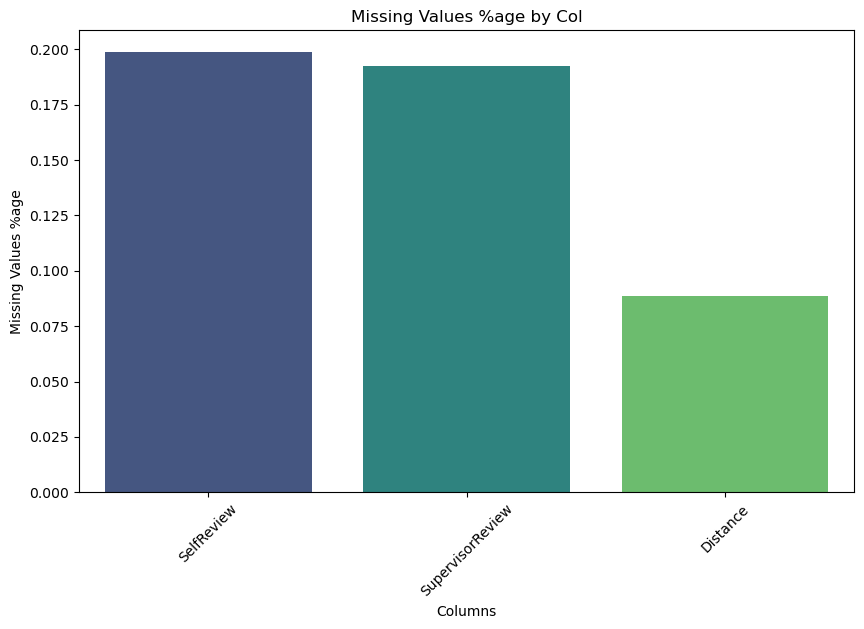

In [10]:
# missing data percentage plot
plt.figure(figsize=(10,6))
sns.barplot(x=miss_data.index, y=miss_data['Missing Values %age'], palette="viridis")
plt.xticks(rotation=45)
plt.ylabel('Missing Values %age')
plt.xlabel('Columns')
plt.title('Missing Values %age by Col')
plt.show()

In [11]:
# populating the missing values with the appropriate value
df['SelfReview'].fillna(df['SelfReview'].median(), inplace=True)
df['SupervisorReview'].fillna(df['SupervisorReview'].median(), inplace=True)
df['Distance'].fillna(df['Distance'].mode()[0], inplace=True)

In [12]:
df.isnull().sum() #verifying new values

RecordId                   0
Gender                     0
Distance                   0
YearsWorked                0
TrainingHours              0
WorkLifeBalance            0
NumOfProjects              0
JobInvolvement             0
TeamSize                   0
MentorshipReceived         0
TechSkillLevel             0
AttendanceRate             0
StressLevel                0
PeerFeedbackScore          0
AnnualLeaveDays            0
Dependents                 0
Certifications             0
OnsiteOpportunities        0
SkillDevelopmentCourses    0
ProjectComplexity          0
WorkSatisfactionScore      0
JobEngagementScore         0
PhysicalActivityScore      0
MentalWellbeingScore       0
PreviousSalary             0
Salary                     0
SelfReview                 0
SupervisorReview           0
DepartmentCode             0
Left                       0
dtype: int64

## 3. Data Cleaning and Preprocessing
**Focus**:  
- Converting `Salary` and `Distance` to appropriate data types.

In [13]:
# dropping unnecessary columns
df=df.drop(['RecordId','SelfReview'], axis=1)

- ⁠Self review can be biased.
- Record id is a unique identifier

In [14]:
# converting salary string to float
df['Salary'] = df['Salary'].str.replace('K', '').astype(float) * 1000
df['PreviousSalary'] = df['PreviousSalary'].str.replace('K', '').astype(float) * 1000

In [15]:
# approximating and converting Distance to float
def distance_conversion(value):
  # normalization for both mile and miles
    value = value.lower().replace("miles", "").replace("mile", "").strip()
    if value.startswith(">"):
        return float(value.replace(">", "").strip()) + 3 # since this one is for ">" approximation can be a little high
    elif value.startswith("<"):
        return float(value.replace("<", "").strip()) - 1 # since this one is for "<" approximation can be a little less
    else:
        return float(value.replace("~", "").strip()) # approximation remains almost same

In [16]:
# application of the function
df['Distance'] = df['Distance'].apply(distance_conversion)

In [17]:
# verification of the function
print(df['Distance'].head())

0    33.0
1    10.0
2     4.0
3    15.0
4    20.0
Name: Distance, dtype: float64


## 4. Data Balancing
**Focus**:  
- Addressing the Class Imbalance and balancing the target variable ('Left') using random sampling.

In [18]:
# count of employees who left (1) and who stayed (0)
left_counts = df['Left'].value_counts()
print(left_counts)

Left
0    207110
1     92890
Name: count, dtype: int64


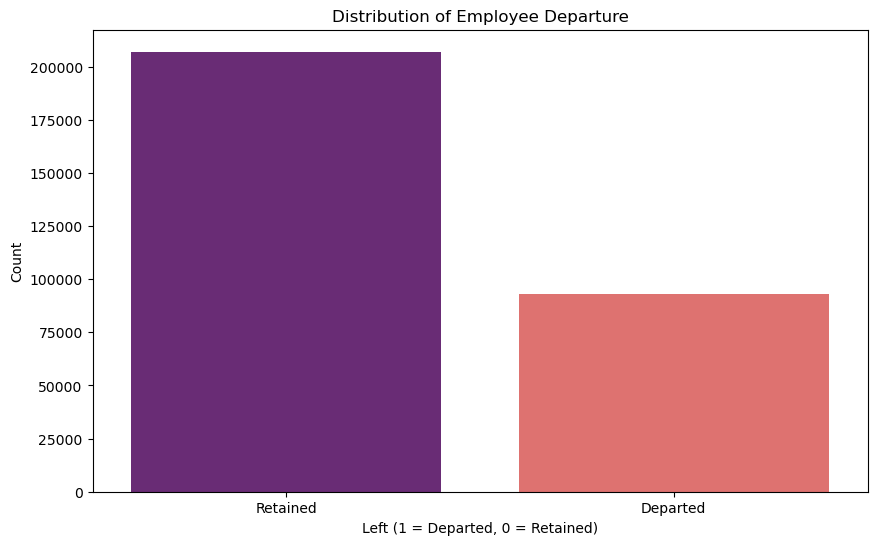

In [19]:
# distribution of Employee Departure (target column: 'Left')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Left', palette='magma')
plt.title('Distribution of Employee Departure')
plt.xlabel('Left (1 = Departed, 0 = Retained)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Retained', 'Departed'])  # Custom x-axis labels
plt.show()

In [20]:
# balancing the values for Left
count_classes = df['Left'].value_counts()
print(count_classes)
# Find the number of instances in the minority class (1)
n_minority = count_classes[1]

Left
0    207110
1     92890
Name: count, dtype: int64


In [21]:
# sample the majority class (0) to match the number of minority instances
df_majority = df[df['Left'] == 0]
df_minority = df[df['Left'] == 1]

In [22]:
# random sample from the majority class
df_majority_sampled = df_majority.sample(n=n_minority, random_state=42)

In [23]:
# combine the sampled majority class with the minority class
df = pd.concat([df_majority_sampled, df_minority])

In [24]:
# shuffle the balanced dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# check the new class distribution
print(df['Left'].value_counts())

Left
1    92890
0    92890
Name: count, dtype: int64


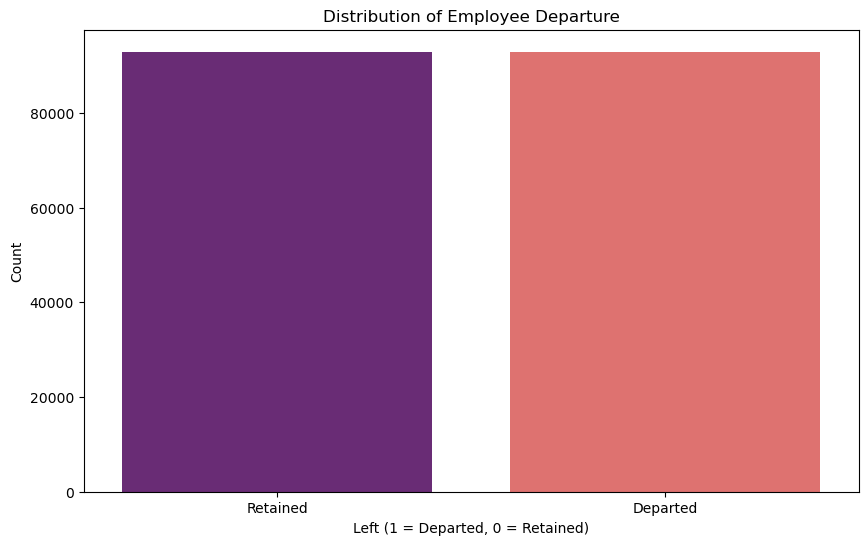

In [25]:
# new distribution of employee departure (target column: 'Left')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Left', palette='magma')
plt.title('Distribution of Employee Departure')
plt.xlabel('Left (1 = Departed, 0 = Retained)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Retained', 'Departed'])  # Custom x-axis labels
plt.show()

## 4. Feature Engineering
**Focus**:  
- Creating new features like `ExperienceLevel`, `SalaryRaiseReceived`, `EmployeeWellbeing`, `CommuteImpact`, etc.

Creating Experience level based on years worked
- 0-3: Entry
- 3-6:Associate
- 6-10:Mid-level
- 10-15:Senior

In [26]:
# exprience level at job
df['ExperienceLevel'] = pd.cut(df['YearsWorked'], bins=[0,3,6,10,15], labels=['Entry-Level', 'Associate' ,'Mid-Level', 'Senior'])
# 0-3: Entry, 3-6:Associate, 6-10:Mid-level, 10-15:Senior

In [27]:
# salary raise received
df['SalaryRaiseReceived'] = df['Salary'] - df['PreviousSalary']

In [28]:
# employee wellbeing
df['EmployeeWellbeing'] = df['PhysicalActivityScore'] + df['MentalWellbeingScore'] / df['StressLevel'] # wellbeing in context of stress level

In [29]:
# impact of commute for onsite work
df['CommuteImpact'] = df['OnsiteOpportunities'] * df['Distance'] #burden of commute for an onsite opp

In [30]:
# job engagement and job fullfilment
df['JobSatisfaction'] = df['WorkSatisfactionScore'] - df['JobEngagementScore'] # positive is good, negative is concerning

In [31]:
# employee workload
df['WorkloadScore'] = (df['NumOfProjects'] * df['ProjectComplexity'])/(df['TeamSize'] + 1) #to avoid 0

In [32]:
# employee participation
df['ParticipationScore'] = df['Certifications'] + df['SkillDevelopmentCourses'] + df['TrainingHours']

In [33]:
# financial load based on dependents
df['FinancialLoad'] = df['Salary'] / (df['Dependents']+1) # to avoid 0

## 5. Exploratory Data Analysis (EDA)
**Focus**:  
- Visualizing and analyzing data distributions, feature relationships, and patterns in employee departure.

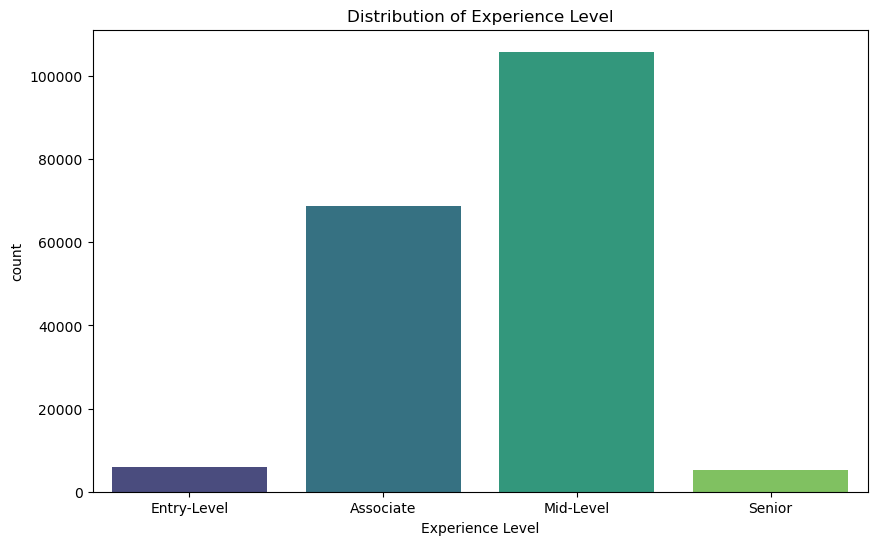

In [34]:
# Distribution of Categorical feature
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ExperienceLevel', palette='viridis')
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.show()

There are more people who are at their mid-seniority level

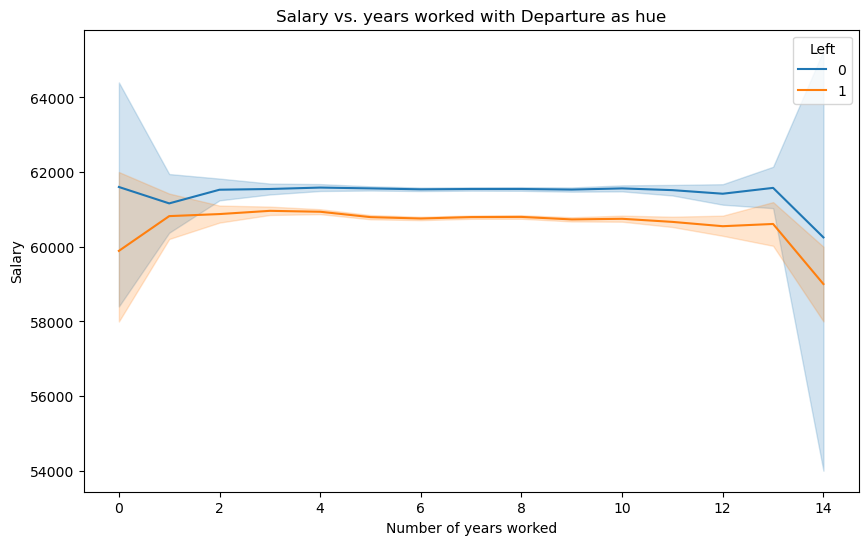

In [35]:
# lineplot for salary and departure
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearsWorked', y='Salary', hue='Left')
plt.xlabel('Number of years worked')
plt.ylabel('Salary')
plt.title('Salary vs. years worked with Departure as hue')
plt.show()

People are leaving more in their recent years.

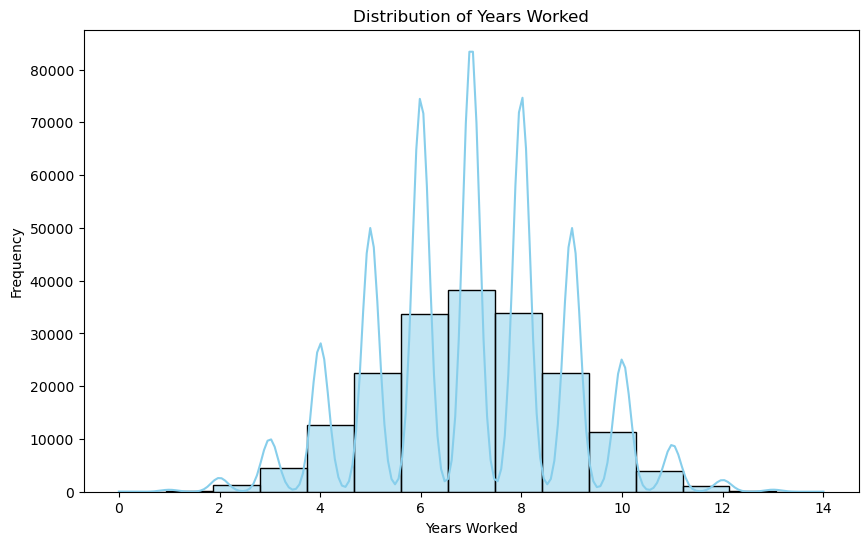

In [36]:
# Distribution of years worked
plt.figure(figsize=(10, 6))
sns.histplot(df['YearsWorked'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Years Worked')
plt.xlabel('Years Worked')
plt.ylabel('Frequency')
plt.show()

The above graph shows a roughly normal distribution of "Years Worked," with most employees having around 5 to 9 years of experience, suggesting a mid-level experience range in the dataset.

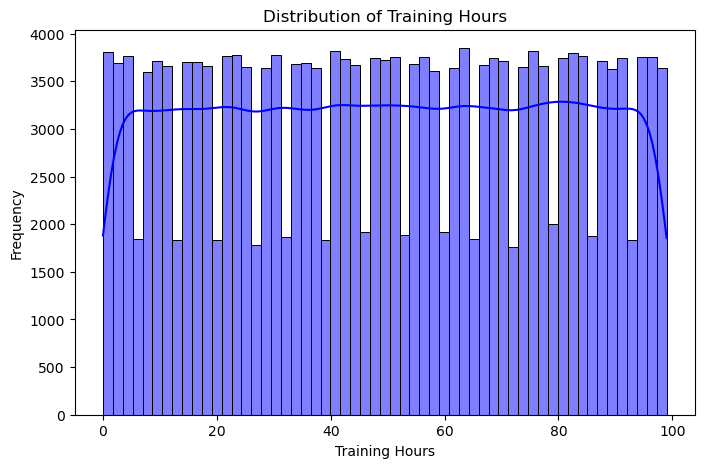

In [37]:
# Distribution of Training Hours
plt.figure(figsize=(8, 5))
sns.histplot(df['TrainingHours'], kde=True, color="blue")
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.show()

The plot shows a relatively uniform distribution of training hours across a range from 0 to 100, with a slight decrease at the extremes.

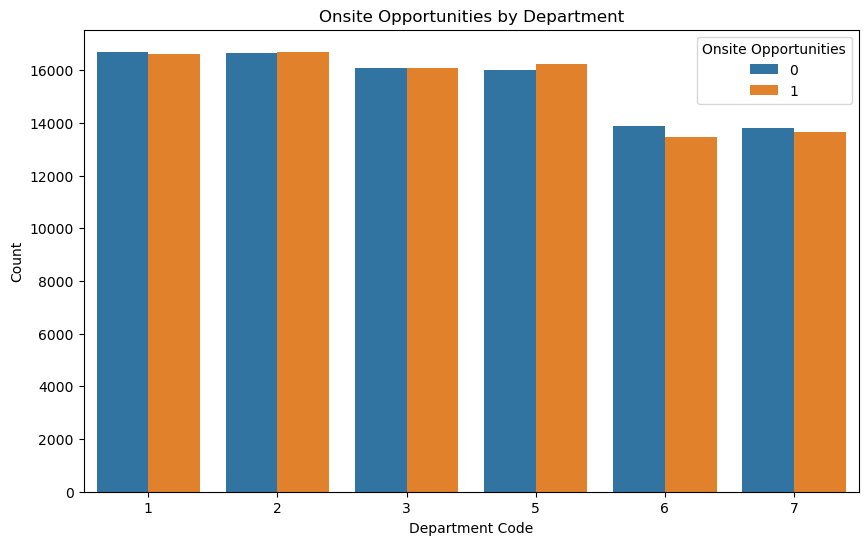

In [38]:
# Onsite Opportunities by Department
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DepartmentCode', hue='OnsiteOpportunities')
plt.title('Onsite Opportunities by Department')
plt.xlabel('Department Code')
plt.ylabel('Count')
plt.legend(title='Onsite Opportunities')
plt.show()

The plot shows how onsite opportunities are spread out among different departments, revealing a nice balance between the two categories (0 and 1) for each department code.

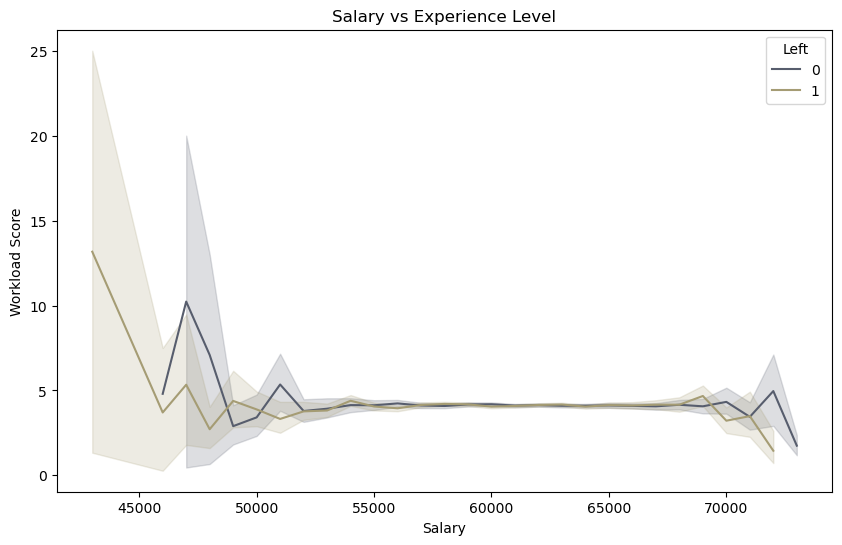

In [39]:
# Workload Score by Experience Level
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Salary', y='WorkloadScore', palette='cividis', hue='Left')
plt.title('Salary vs Experience Level')
plt.xlabel('Salary')
plt.ylabel('Workload Score')
plt.show()

The graph's suggesting that people's stress levels tend to be highest at both the lower and higher ends of the pay scale, with a sweet spot of work-life balance in the middle salary range.

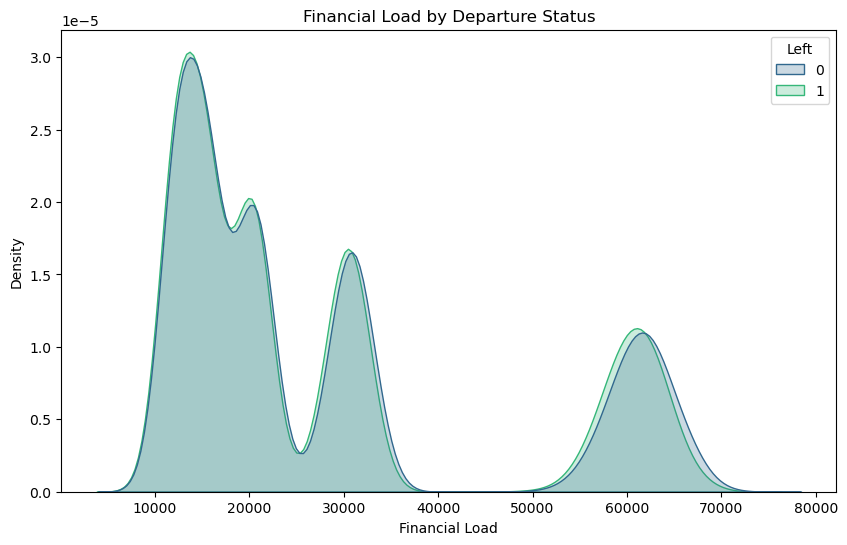

In [40]:
#Financial Load by Departure Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='FinancialLoad', hue='Left', fill=True, palette='viridis')
plt.title('Financial Load by Departure Status')
plt.xlabel('Financial Load')
plt.ylabel('Density')
plt.show()

Most folks at the company are juggling financial loads between $15-20K, regardless of whether they're planning to stick around or leave.

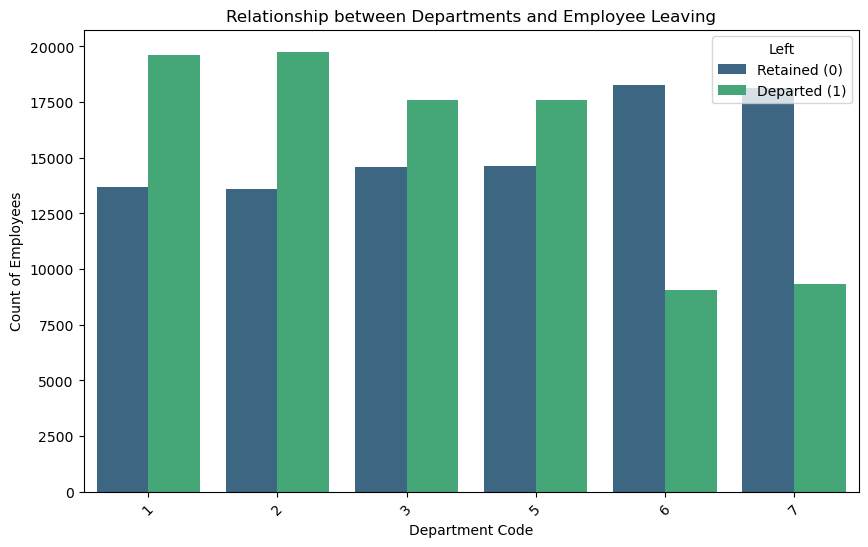

In [41]:
# Relationship between Departments and Employee leaving
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DepartmentCode', hue='Left', palette='viridis', dodge=True)
plt.title('Relationship between Departments and Employee Leaving')
plt.xlabel('Department Code')
plt.ylabel('Count of Employees')
plt.legend(title='Left', labels=['Retained (0)', 'Departed (1)'])
plt.xticks(rotation=45)
plt.show()

Departments 6 and 7 seem to be doing something right with great retention rates, while departments 1 and 2 might want to figure out why they're losing more people than they're keeping.

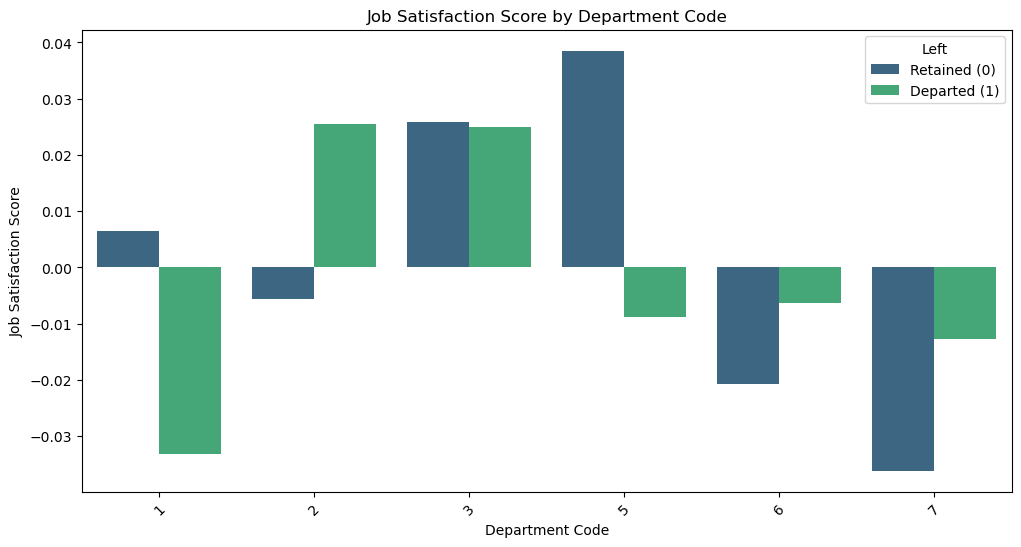

In [42]:
# Job Satisfaction Score by Department Code
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DepartmentCode', y='JobSatisfaction', hue='Left', palette='viridis', ci=None)
plt.title('Job Satisfaction Score by Department Code')
plt.xlabel('Department Code')
plt.ylabel('Job Satisfaction Score')
plt.legend(title='Left', labels=['Retained (0)', 'Departed (1)'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Department 5 seems to be a happy place to work, while Department 1 shows the biggest gap between satisfied folks who stayed and unsatisfied ones who left.

## 7. Feature Selection
**Focus**:  
- Using Random Forest to analyze feature importance and selecting relevant features.

In [43]:
# preparing data for modeling and feature selection
X = df.drop('Left', axis=1)
y = df['Left']

In [44]:
# one-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

In [45]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
# feature selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

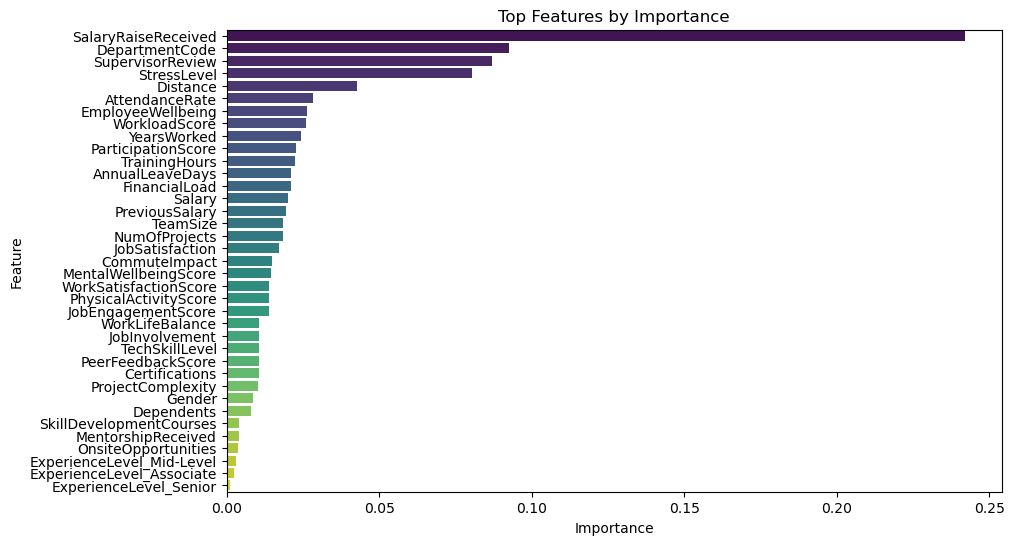

In [48]:
# display feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [49]:
# select features based on importance threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

## 8. Model Building and Evaluation
**Code**:  
- Building and evaluating Logistic Regression, Decision Tree and Random Forest models, with confusion matrix, classification report, and ROC-AUC curve.

In [50]:
# function to evaluate model
def model_evaluation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Report of Classification:\n", classification_report(y_test, y_pred))
    print("\n\n\n")
    
    # confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Departed'], yticklabels=['Retained', 'Departed'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n\n\n")
    
    # roc-auc score
    y_pred_prob = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC Score:", roc_auc)
    print("\n\n\n")
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # plot roc curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression:



Report of Classification:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     18578
           1       0.75      0.76      0.76     18578

    accuracy                           0.75     37156
   macro avg       0.75      0.75      0.75     37156
weighted avg       0.75      0.75      0.75     37156







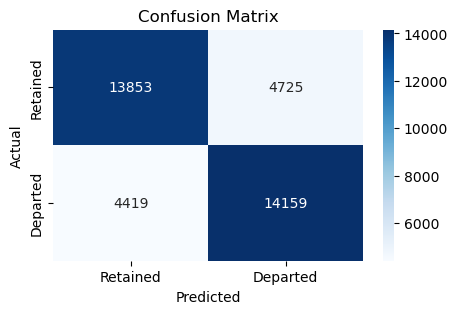





ROC-AUC Score: 0.827664905969566






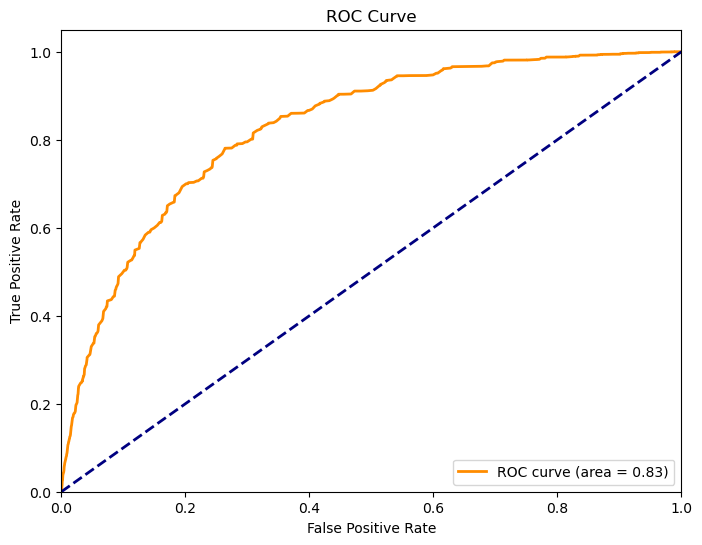

In [51]:
# logistic regression
print("Logistic Regression:")
print("\n\n")
logreg_model = LogisticRegression(max_iter=1000)
model_evaluation(logreg_model, X_train_selected, y_train, X_test_selected, y_test)

Decision Tree:



Report of Classification:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79     18578
           1       0.77      0.87      0.82     18578

    accuracy                           0.80     37156
   macro avg       0.81      0.80      0.80     37156
weighted avg       0.81      0.80      0.80     37156







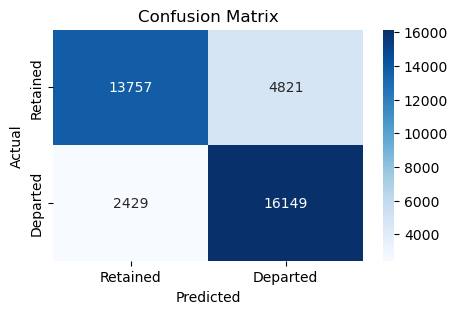





ROC-AUC Score: 0.8964258282105058






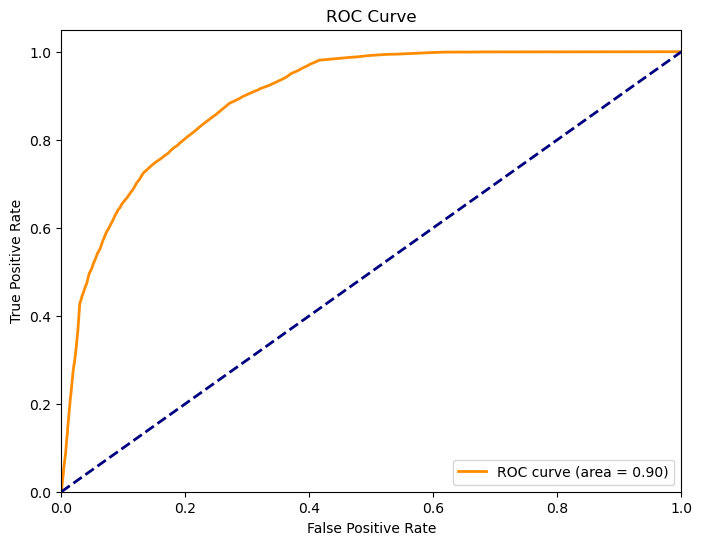

In [52]:
# decision tree
print("Decision Tree:")
print("\n\n")
dt_model = DecisionTreeClassifier(random_state=42) 
model_evaluation(dt_model, X_train_selected, y_train, X_test_selected, y_test)

Random Forest:



Report of Classification:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79     18578
           1       0.77      0.87      0.82     18578

    accuracy                           0.80     37156
   macro avg       0.81      0.80      0.80     37156
weighted avg       0.81      0.80      0.80     37156







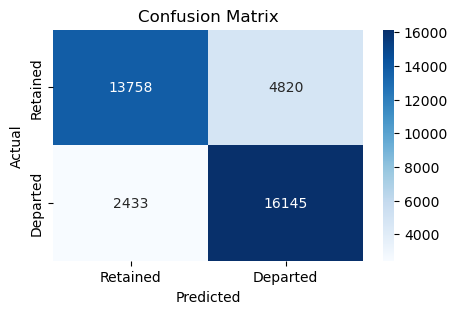





ROC-AUC Score: 0.8966114343795875






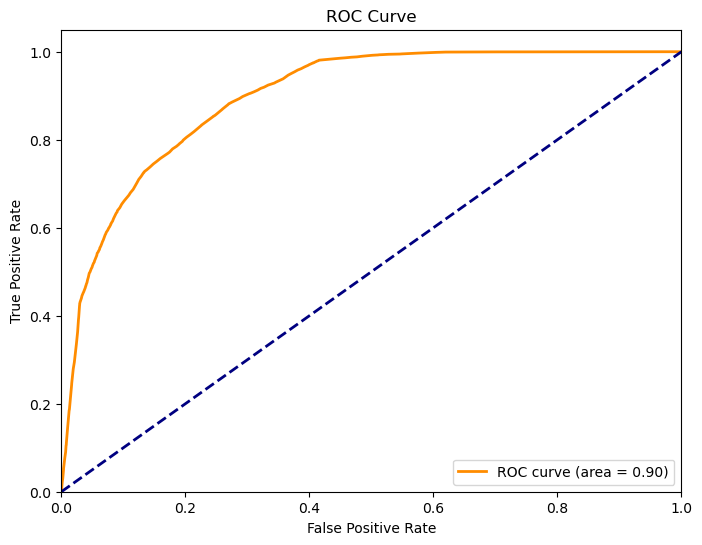

In [53]:
# random forest
print("Random Forest:")
print("\n\n")
rf_model = RandomForestClassifier(random_state=42)
model_evaluation(rf_model, X_train_selected, y_train, X_test_selected, y_test)

In [54]:
# define numerical and categorical features
numerical_features = ['YearsWorked', 'TrainingHours', 'Salary', 'PreviousSalary',
                       'Distance', 'SupervisorReview', 'WorkSatisfactionScore',
                       'JobEngagementScore', 'JobInvolvement', 'PerformanceRating',
                       'EnvironmentSatisfaction', 'WorkLifeBalance', 'StressLevel',
                       'RelationshipSatisfaction', 'PhysicalActivityScore',
                       'MentalWellbeingScore', 'AttendanceRate', 'TeamSize',
                       'OnsiteOpportunities', 'OvertimeHours', 'NumProjects',
                       'ProjectComplexity', 'Certifications', 'SkillDevelopmentCourses',
                       'SalaryRaiseReceived', 'EmployeeWellbeing', 'CommuteImpact',
                       'JobSatisfaction', 'WorkloadScore', 'ParticipationScore',
                       'FinancialLoad']
categorical_features = ['DepartmentCode', 'ExperienceLevel_Associate',
                         'ExperienceLevel_Mid-Level', 'ExperienceLevel_Senior'] 

numerical_features = [f for f in numerical_features if f in selected_features]
categorical_features = [f for f in categorical_features if f in selected_features]

In [55]:
# create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

In [56]:
# creating pipelines for different models
pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])
}

In [57]:
pipelines

{'Logistic Regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['SupervisorReview',
                                                    'StressLevel',
                                                    'SalaryRaiseReceived']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse_output=False),
                                                   ['DepartmentCode'])])),
                 ('classifier', LogisticRegression(max_iter=1000))]),
 'Random Forest': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['SupervisorReview',
                                                    'StressLevel',
     

In [58]:
for model_name, pipeline in pipelines.items():
    print(f"Evaluating {model_name}:")
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make predictions
    y_pred = pipeline.predict(X_test)
    
    # evaluating the model
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # roc-auc Score
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC Score:", roc_auc)
    print("-" * 30)  # Separator between models

Evaluating Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75     18578
           1       0.75      0.75      0.75     18578

    accuracy                           0.75     37156
   macro avg       0.75      0.75      0.75     37156
weighted avg       0.75      0.75      0.75     37156


Confusion Matrix:
 [[13836  4742]
 [ 4591 13987]]
ROC-AUC Score: 0.8333085382308811
------------------------------
Evaluating Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79     18578
           1       0.77      0.87      0.82     18578

    accuracy                           0.80     37156
   macro avg       0.81      0.80      0.80     37156
weighted avg       0.81      0.80      0.80     37156


Confusion Matrix:
 [[13758  4820]
 [ 2433 16145]]
ROC-AUC Score: 0.8966183822428331
------------------------------
Evaluati

### Logistic Regression
- **Classification Report**: Both precision and recall for each class are about 0.75, leading to an accuracy of 75%. This means Logistic Regression is moderately effective at distinguishing between the two classes but has lower precision and recall compared to the other models.
- **Confusion Matrix**: Shows that approximately 4,742 instances of class 0 and 4,591 of class 1 are misclassified.
- **ROC-AUC Score**: 0.83, indicating moderate separability between the classes, with limited ability to distinguish between the two.
  
**Key Insight**: Logistic Regression, being a linear model, may not fully capture complex relationships in the data. This is often reflected in slightly lower accuracy, precision, and recall when there are nonlinear or complex patterns in the features.

### Decision Tree
- **Classification Report**: With 0.85 precision for class 0 and 0.87 recall for class 1, Decision Tree performs better than Logistic Regression, especially in recall for class 1. This suggests that it captures some of the nonlinearity in the data.
- **Confusion Matrix**: Fewer misclassifications than Logistic Regression, especially for class 1, indicating it identifies more true positives effectively.
- **ROC-AUC Score**: 0.896, an improvement over Logistic Regression, reflecting better class separation.

**Key Insight**: Decision Tree can handle nonlinear data better than Logistic Regression and provides a more granular split of data based on decision rules. However, a single decision tree can be prone to overfitting, especially if it’s too deep or not carefully pruned. 

### Random Forest
- **Classification Report**: Shows the best balance of precision (0.85 for class 0 and 0.87 recall for class 1), similar to Decision Tree but with greater stability and slightly higher accuracy.
- **Confusion Matrix**: Fewer misclassifications than both Logistic Regression and Decision Tree, with high recall in both classes.
- **ROC-AUC Score**: 0.896, indicating strong separability between classes and slight improvement over Decision Tree.

**Key Insight**: Random Forest, an ensemble of decision trees, benefits from "bagging" (bootstrap aggregating), where it combines the predictions of multiple trees. This reduces the risk of overfitting common with a single Decision Tree by averaging multiple trees' predictions. It captures complex patterns in the data better than Logistic Regression, making it ideal for situations with nonlinear features.

### Why Random Forest Might Be Better
- **Stability**: Random Forest, as an ensemble method, is less prone to overfitting than a single Decision Tree. By averaging the results of many trees, it creates a more stable and reliable model.
- **Higher Accuracy and ROC-AUC**: Random Forest achieves a higher ROC-AUC score than Logistic Regression, meaning it’s better at distinguishing between classes. Its accuracy and classification metrics also outperform Logistic Regression, providing a strong case for its use.
- **Nonlinear Patterns**: Random Forest captures complex, nonlinear relationships in the data, which Logistic Regression, a linear model, cannot.

## 9. Random Forest Model and Optimization
 **Focus**:  
- Creating a pipeline with preprocessing,developing the final Random Forest model, and performing cross-validation.

**The aim with this part to create the the final prediction model with Random Forest along with it's subsequent pipeline and also to perform cross-validation. So, this whole section will start with feature selection, creating the Random Forest pipeline and model evaluation.**

In [59]:
# numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['DepartmentCode','ExperienceLevel']

In [60]:
# initial model to assess feature importance
initial_model = RandomForestClassifier(random_state=42)
initial_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [61]:
# feature importance and diff data frame for this
feature_importance = initial_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

In [62]:
# selected features
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()

In [63]:
# filter X to only include selected features
X_selected = X[selected_features]

In [64]:
# Column Transformer
numerical_features_selected = [f for f in numerical_features if f in selected_features]
categorical_features_selected = [f for f in categorical_features if f in selected_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_selected),
        ('cat', OneHotEncoder(drop='first'), categorical_features_selected)
    ])

In [65]:
# RF pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [66]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
# fitting the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['StressLevel',
                                                   'SupervisorReview',
                                                   'DepartmentCode',
                                                   'SalaryRaiseReceived']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['DepartmentCode'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [68]:
# prediction on test set
y_pred = rf_pipeline.predict(X_test)

Random Forest Model Evaluation:


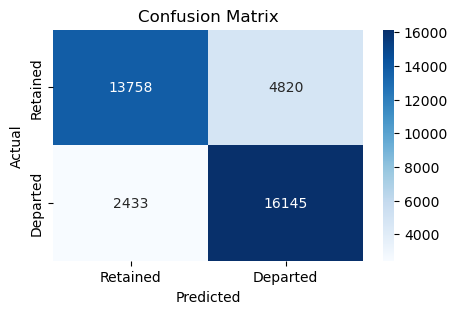

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     18578
           1       0.77      0.87      0.82     18578

    accuracy                           0.80     37156
   macro avg       0.81      0.80      0.80     37156
weighted avg       0.81      0.80      0.80     37156



In [69]:
# model evaluation
print("Random Forest Model Evaluation:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Departed'], yticklabels=['Retained', 'Departed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

ROC-AUC Score: 0.8966101044925023


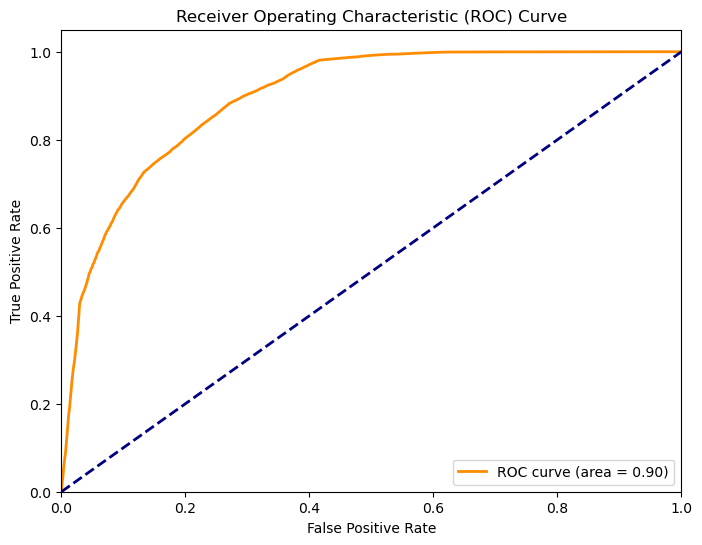

In [70]:
# roc-auc score
y_pred_prob = rf_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (leaving)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# roc-auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
# cross-validation

# number of cross-validation folds
cv_folds = 5

# perform cross-validation on the pipeline with selected features
cv_results = cross_validate(
    rf_pipeline,             # Pipeline with preprocessing and model
    X_selected,              # Selected feature set
    y,                       # Target variable
    cv=cv_folds,             # Number of folds
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],  # Metrics to evaluate
    return_train_score=True  # Option to return train scores (optional)
)

# display results
print("Cross-Validation Results (Mean Scores):")
for metric in cv_results.keys():
    print(f"{metric}: {np.mean(cv_results[metric]):.4f}")

Cross-Validation Results (Mean Scores):
fit_time: 2.2685
score_time: 0.4462
test_accuracy: 0.8042
train_accuracy: 0.8055
test_precision: 0.7676
train_precision: 0.7687
test_recall: 0.8728
train_recall: 0.8738
test_f1: 0.8168
train_f1: 0.8179
test_roc_auc: 0.8964
train_roc_auc: 0.8989


## 10. Prediction and Conclusion
**Code**:  
- Generating predictions and summarizing insights and conclusions.

In [72]:
# final predictions
prediction_df = pd.DataFrame({
    'DepartmentCode': df.loc[y_test.index,'DepartmentCode'],
    'Actual': y_test,
    'Predicted': y_pred
})

In [73]:
print("1:Departed, 0:Retained:\n\n",prediction_df.head())

1:Departed, 0:Retained:

         DepartmentCode  Actual  Predicted
144421               3       1          0
8058                 3       0          0
56848                2       1          1
78490                7       1          1
115583               6       0          0


In [74]:
# grouping predictions and actual departures by department
department_predictions = prediction_df.groupby('DepartmentCode')['Predicted'].sum()
department_actuals = prediction_df.groupby('DepartmentCode')['Actual'].sum()

# creating a dataframe for comparison
comparison_df = pd.DataFrame({
    'Predicted Departures': department_predictions,
    'Actual Departures': department_actuals
})

# calculting the difference
comparison_df['Difference'] = comparison_df['Predicted Departures'] - comparison_df['Actual Departures']

# sorting by predicted departures in descending order
comparison_df = comparison_df.sort_values(by='Predicted Departures', ascending=False)

# printing the comparison dataframe
print("Comparison of Predicted and Actual Departures by Department:")
print(comparison_df)

Comparison of Predicted and Actual Departures by Department:
                Predicted Departures  Actual Departures  Difference
DepartmentCode                                                     
1                               4932               3901        1031
2                               4899               3972         927
5                               4270               3519         751
3                               4092               3563         529
7                               1415               1835        -420
6                               1357               1788        -431


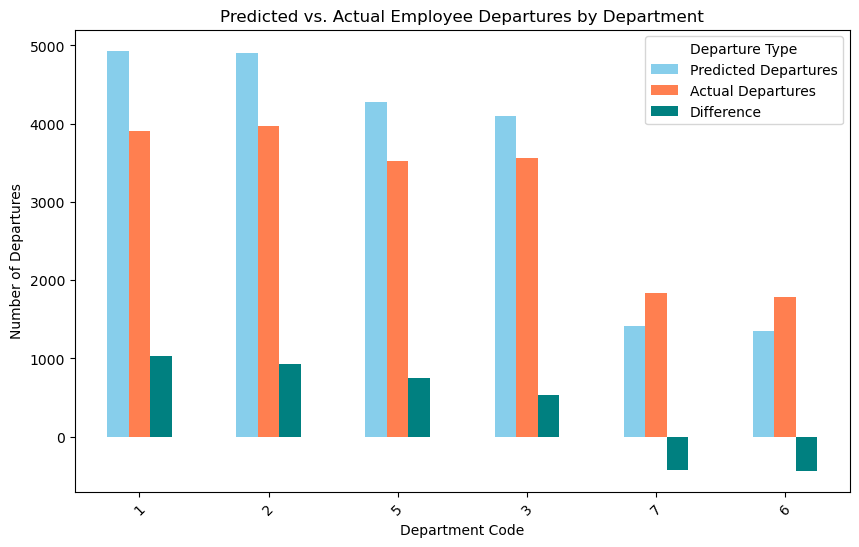

In [75]:
# visualizing the results using a grouped bar plot
comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'coral','teal'])
plt.title('Predicted vs. Actual Employee Departures by Department')
plt.xlabel('Department Code')
plt.ylabel('Number of Departures')
plt.xticks(rotation=45)
plt.legend(title='Departure Type')
plt.show()

# Conclusion Summary

- Our analysis shows that the model is performing an extremely strong job in predicting employee flight, especially considering various complexities across different departments. First, a summary of the key findings and what they mean in practical terms follows:

1. **Predicted vs. Actual Departures by Department**:
	* The model generally tends to align with the actual numbers of departures, although there are minor variations across departments.
For example, in departments 1, 2, and 5, it over-predicts slightly for about 700-1,000 employees.
In departments 6 and 7, it underestimates about 400 employees.
This chasm might indicate that the model would perform better if more information could be integrated into it at the department level to make more accurate predictions.
2. **Model Performance Metrics:**
Precision: The accuracy of this model on the whole lies at about 80% for both training and testing data. It also shows that it generalizes quite well to new data.
It is by its **precision** (77%) that it means most of the predicted departures indeed turn out to be actual departures, and the **recall** gives a high value of 87%, reflecting the efficiency of the model in picking out those who are likely to leave. Indeed, this higher value of recall is more important because it means we can flag most of the potential flights for proactive intervention.
It has an **F1 score** of 82% and **ROC AUC score** of 89.6%, which is a good balance in the model's performance of true departures and avoidance of false alarms.

3. **Summary Performance:**
It does appear that the model is a bit stronger in its predictions for those staying on as opposed to those leaving, but it captures the instances of departures well nonetheless. It's reasonable for our goal of identifying as many potential leavers as possible that we wouldn't be too concerned with a slight trade-off in precision to achieve this high recall.  

### Final Thoughts
Generally, the model works as a very dependable tool for estimating the departures, with a strong foundation to shape the retention strategy across departments. If we want to increase the predictive power, then we could try some department-specific modeling. For now, this model is well-placed to keep us ahead of the turnover trends and, therefore, make retention efforts more focused.